In [41]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
#Read data
frailty_data = pd.read_csv('raw_frailty_data.csv')
print(frailty_data)

   Height  Weight  Age  Grip Strength Frailty
0    65.8     112   30             30       N
1    71.5     136   19             31       N
2    69.4     153   45             29       N
3    68.2     142   22             28       Y
4    67.8     144   29             24       Y
5    68.7     123   50             26       N
6    69.8     141   51             22       Y
7    70.1     136   23             20       Y
8    67.9     112   17             19       N
9    66.8     120   39             31       N


**Data Processing**

In [43]:
#Convert weight (from pounds to kilograms)
frailty_data['Weight_in_kg'] = frailty_data['Weight'] * 0.453592
frailty_data['Weight_in_kg'] = frailty_data['Weight_in_kg'].round(2)

#Convert Frailty column to binary
label = LabelEncoder()
frailty_data['Frailty']=label.fit_transform(frailty_data['Frailty'])

frailty_data.to_csv('clean_frailty_data.csv',index=False)

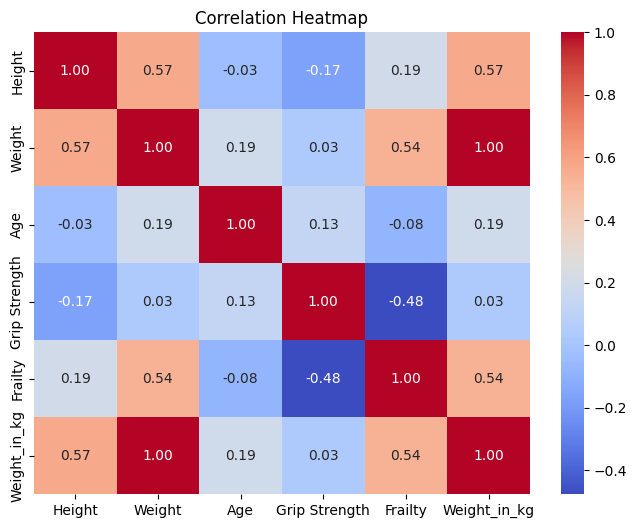

In [44]:
# Compute the correlation matrix
data = frailty_data.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [50]:
from scipy.stats import pearsonr

correlation, p_value = pearsonr(frailty_data['Weight'], frailty_data['Frailty'])
print(f'Correlation: {correlation}, p-value: {p_value}')



Correlation: 0.5352001404158714, p-value: 0.11089488733773722


                 Height    Weight       Age  Grip Strength   Frailty  \
Height         1.000000  0.571525 -0.032580      -0.167682  0.193186   
Weight         0.571525  1.000000  0.190926       0.032807  0.535200   
Age           -0.032580  0.190926  1.000000       0.133756 -0.083655   
Grip Strength -0.167682  0.032807  0.133756       1.000000 -0.475867   
Frailty        0.193186  0.535200 -0.083655      -0.475867  1.000000   
Weight_in_kg   0.571575  1.000000  0.190919       0.032729  0.535295   

               Weight_in_kg  
Height             0.571575  
Weight             1.000000  
Age                0.190919  
Grip Strength      0.032729  
Frailty            0.535295  
Weight_in_kg       1.000000  
